In [2]:
import numpy as np
from qiskit.visualization import plot_histogram
import interferometer as itf
from interferometer_circuits.numeric_truncated_unitaries import *
from interferometer_circuits.direct_decomposition import *
from interferometer_circuits.boson_sampling_probabilities import *
from interferometer_circuits.simulation import *
from random import random
from qiskit.quantum_info import Operator

In [3]:
random_unitary(3)

array([[ 0.24329714+0.38015633j, -0.72601558-0.27969383j,
         0.40010328-0.17572072j],
       [-0.36643733-0.10953649j, -0.60120539+0.0492472j ,
        -0.52765593+0.45981676j],
       [ 0.78420855+0.18716318j,  0.11782405-0.13006546j,
        -0.33061751+0.458126j  ]])

In [2]:
def zero_close_elements(matrix, threshold=1e-10):
    """
    Sets elements in the complex matrix to zero if their magnitude is close to zero.
    
    Parameters:
    matrix (np.ndarray): A 2D numpy array with complex numbers.
    threshold (float): A small threshold value to determine what is considered close to zero.
    
    Returns:
    np.ndarray: A matrix with elements close to zero set to exactly zero.
    """
    real_close_to_zero = np.abs(matrix.real) < threshold
    imag_close_to_zero = np.abs(matrix.imag) < threshold
    
    matrix.real[real_close_to_zero] = 0
    matrix.imag[imag_close_to_zero] = 0
    
    return matrix

## Single beamsplitter test

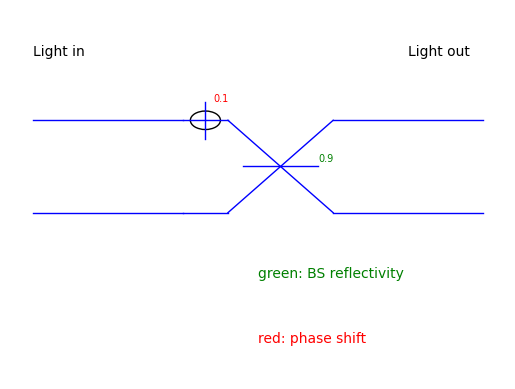

In [3]:
# Make one beamsplitter interferometer
I = itf.Interferometer()

theta_1 = 0.1
phi_1 = 0.1

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)

I.add_BS(BS1)
I.draw()

In [5]:
# UNIT TEST
# Test that numeric truncated unitary gives me the correct beamsplitter description:
UBS = I.calculate_transformation()
reverse_qargs(numeric_truncated_unitary(UBS,1))

array([[ 1.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.99500417+6.21247845e-17j,
         0.09933467+9.96671108e-03j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j, -0.09983342+4.68375339e-17j,
         0.99003329+9.93346654e-02j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.99500417+9.98334166e-02j]])

In [6]:
# UNIT TEST: 
# Check that the compiled circuit is giving the correct matrix
qc = decompose_from_interferom(I, 1)
U_circ = Operator(qc).reverse_qargs().data
for row in zero_close_elements(U_circ):
    print(row)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.        +0.j         0.99500417+0.j         0.09933467+0.00996671j
 0.        +0.j        ]
[ 0.        +0.j         -0.09983342+0.j          0.99003329+0.09933467j
  0.        +0.j        ]
[0.        +0.j         0.        +0.j         0.        +0.j
 0.99500417+0.09983342j]


In [7]:
print(qc)

global phase: 4.7623
        ┌─────────────────────┐            ┌────────────────────┐        »
q_0: ───┤ U3(π/2,-π/2,2.0385) ├─────■──────┤ U3(3.0416,-π,-π/2) ├─────■──»
     ┌──┴─────────────────────┴──┐┌─┴─┐┌───┴────────────────────┴──┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0.3677) ├┤ X ├┤ U3(1.5708,1.4708,-1.5707) ├┤ X ├»
     └───────────────────────────┘└───┘└───────────────────────────┘└───┘»
«       ┌───────────────────┐    ░ 
«q_0: ──┤ U3(π/2,-1.9385,0) ├────░─
«     ┌─┴───────────────────┴──┐ ░ 
«q_1: ┤ U3(1.5721,2.7739,-π/2) ├─░─
«     └────────────────────────┘ ░ 


## Full interferometer test

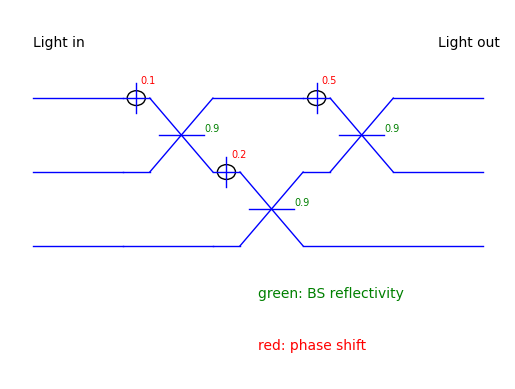

In [3]:
# Make three beamsplitter interferometer
I = itf.Interferometer()

theta_1 = 0.1
phi_1 = 0.1

theta_2 = 0.3
phi_2 = 0.2

theta_3 = 0.1
phi_3 = 0.5

BS3 = itf.Beamsplitter(1, 2, theta=theta_3, phi=phi_3)
BS2 = itf.Beamsplitter(2, 3, theta=theta_2, phi=phi_2)
BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)

I.add_BS(BS1)
I.add_BS(BS2)
I.add_BS(BS3)
I.draw()

In [4]:
# UNIT TEST
U = I.calculate_transformation()
print(U)

[[ 0.80801344+0.55620103j -0.18018076-0.0664769j   0.02950279+0.j        ]
 [ 0.17264399+0.08413286j  0.91821499+0.18312612j -0.29404384+0.j        ]
 [ 0.02818509+0.00871867j  0.28818254+0.05841749j  0.95533649+0.j        ]]


In [5]:
U_trunc = numeric_truncated_unitary(U, 1) # Truncated unitary

In [6]:
qc = decompose_from_interferom(I, 1)
U_circ = Operator(qc).data

# print(qc)
# Seems like the gates are acting on the qubits they belong, but maybe the beamsplitter

global phase: 4.9621
        ┌─────────────────────┐            ┌────────────────────┐        »
q_0: ───┤ U3(π/2,-π/2,2.0385) ├─────■──────┤ U3(3.0416,-π,-π/2) ├─────■──»
     ┌──┴─────────────────────┴──┐┌─┴─┐┌───┴────────────────────┴──┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0.3677) ├┤ X ├┤ U3(1.5708,1.4708,-1.5707) ├┤ X ├»
     └───────────────────────────┘└───┘└───────────────────────────┘└───┘»
q_2: ────────────────────────────────────────────────────────────────────»
                                                                         »
«       ┌───────────────────┐    ░                                »
«q_0: ──┤ U3(π/2,-1.9385,0) ├────░────────────────────────────────»
«     ┌─┴───────────────────┴──┐ ░  ┌─────────────────────┐       »
«q_1: ┤ U3(1.5721,2.7739,-π/2) ├─░──┤ U3(π/2,π/2,-1.0281) ├────■──»
«     └────────────────────────┘ ░ ┌┴─────────────────────┴─┐┌─┴─┐»
«q_2: ───────────────────────────░─┤ U3(3.1403,π/2,-2.7989) ├┤ X ├»
«                                ░ └──────────

Interestingly, it looks like the circuits are virtually identical with the exception of one ancilla qubit.
Why does this change the unitary in the way that it does?

In [7]:
# Statevectors for |001>, |010>, |100>
state001 = np.array([0,1,0,0,0,0,0,0], complex)
state010 = np.array([0,0,1,0,0,0,0,0], complex)
state100 = np.array([0,0,0,0,1,0,0,0], complex)

# Little endian
# L100 = np.array([0,1,0,0,0,0,0,0], complex)
# L010 = np.array([0,0,1,0,0,0,0,0], complex)
# L001 = np.array([0,0,0,0,1,0,0,0], complex)

In [13]:
for el in reverse_qargs(U_trunc) @ state001:
    print(el)

0j
(0.9553364891256055+1.2576745200831851e-17j)
(-0.29404383655185595-2.972069205325889e-17j)
0j
(0.029502791919178206+3.9898639947466563e-17j)
0j
0j
0j


In [12]:
rounded_U_circ = zero_close_elements(reverse_qargs(U_circ))
for el in rounded_U_circ @ state001:
    print(el)

0j
(0.9553364891256061+0j)
(-0.2940438365518564+0j)
0j
(0.02950279191917817+0j)
0j
0j
0j


I've identified that this is an indexing issue. I was expecting the matrix:

U1trunc \circletimes I2

but instead I'm getting the matrix

I2 \circletimes U1trunc.

It's not clear to me why this doesn't flip U1trunc as well?
In theory this should be fixed by reversing the qubits in the operator but this doesn't seem to help...

I seem to have fixed the issue by reversing the qubit ordering in numeric_truncated_unitaries

In [14]:
rounded_U_circ

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.99500417+0.j        ,
         0.09933467+0.00996671j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.09983342+0.j        ,
         0.99003329+0.09933467j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.99500417+0.09983342j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0

In [15]:
# Try reversing qargs
test = Operator(U_circ).reverse_qargs().data
for el in test @ state100:
    print(el)

0j
0j
(-0.09983341664682763+0j)
0j
(0.9950041652780257+0j)
0j
0j
0j


In [17]:
# Try reversing qargs
test = Operator(U_circ).reverse_qargs().data
for el in test @ state100:
    print(el)

0j
0j
(-0.09983341664682763+0j)
0j
(0.9950041652780257+0j)
0j
0j
0j


In [18]:
for el in U_trunc @ state100:
    print(el)

0j
0j
(0.09933466539753068+0.009966711079379029j)
0j
(0.9900332889206211+0.09933466539753073j)
0j
0j
0j


# Test:
Feed qiskit a matrix but where the qargs are flipped

In [95]:
# Make one beamsplitter interferometer
I = itf.Interferometer()

theta_1 = 0.1
phi_1 = 0.1

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)

I.add_BS(BS1)

UBS = I.calculate_transformation() # Don't try to reverse_qargs on this. It sees one qubit and does nothing.
UBS_trunc = numeric_truncated_unitary(UBS, 1)
UBS_trunc_flipped = Operator(UBS_trunc).reverse_qargs().data
U_trunc_flipped = np.kron(np.eye(2), UBS_trunc_flipped)
U_test = Operator(U_trunc_flipped).reverse_qargs().data

In [102]:
U_test @ state100

array([0.        +0.j        , 0.        +0.j        ,
       0.09933467+0.00996671j, 0.        +0.j        ,
       0.99003329+0.09933467j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])